<a href="https://colab.research.google.com/github/JulieChemille/SVM/blob/main/02_svm_kernel_td.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1> TD N°2 : SVM non linéaire</h1></center>


## Import package

In [3]:
!pip install sklearn_evaluation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 329 kB/s 
     |████████████████████████████████| 1.5 MB 14.6 MB/s 
     |████████████████████████████████| 843 kB 44.2 MB/s 
     |████████████████████████████████| 96 kB 2.4 MB/s 
     |████████████████████████████████| 1.6 MB 51.3 MB/s 
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [4]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import time
#Viz
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#Modélisation 
#Classifier
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier , LogisticRegression
#Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Eval
from sklearn.model_selection import cross_val_score ,learning_curve ,GridSearchCV
from sklearn_evaluation import plot


In [6]:
from matplotlib.pyplot import figure
sns.set(rc={'figure.figsize':(10,8.25)})

## Function

In [7]:
def plot_predictions(clf, axes):
    
    ''''
    Plot prediction permet de visualiser la frontière de décision d'un SVM avec kernel.
    Elle ne marche qu'avec 2 features (2 dimensions)
    
    IL FAUT également tracer votre X_train avant de faire cette fonction!!
    
    '''
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    

#clf = model SVC
#axes = [xlim_min, xlim_max, ylim_min, ylim_max]

## Enoncé TD

#### Exploration and data analysis (EDA)

1) Importer le jeu de données breast cancer disponible dans le module sklearn.datasets<br>
2) Analyser le dataset avec des statistiques descriptives<br>
3) Recoder les variables si nécessaire<br>
4) Faites une première étape de feature selection avec votre analyse statistique<br> 

#### Modélisation binaire

5) Importer les modèles suivants **SGDClassifier, SVC, LogisticRegression**<br>
6) Regarder l'effet du changement de noyau pour la fonction **SVC**<br>
- 6.1) Garder uniquement 2 features pour cette partie<br>
- 6.2) Utiliser la fonction **plot_predictions** pour voir la fonction de décision en fonction du noyau<br>
- 6.3) Varier les autres hyperparamètres en plus du **kernel**<br>

7) Lancer vos modèles sur les features que vous avez gardés avec vos statistiques descriptives( pour **SVC** utiliser plusieurs noyaux)<br>
8) Réaliser une cross-validation afin de déterminer des modèles prometteurs. Ne pas tuner les hyperparamètres<br>
9) Analyser vos résultats (metrics, erreurs de prédictions, ...)<br>
10) Tuner pour obtenir le meilleur modèle et réaliser une prédiction<br>
- 10.1) Analyser les variables importantes de votre modèle



## Description du dataset



<img src="https://www.researchgate.net/profile/Faiza-Khattak/publication/281099329/figure/fig3/AS:284623327252504@1444870897714/Example-images-of-the-breast-cancer-dataset-From-left-to-right-First-three-are.png" alt="image_breast_cancer.png" style="width:800px;"/>
</p>

Le data set breast cancer contient des informations sur la caractéristiques de tumeur bénine ou non.<br>
Les informations sont issues d'images  (exmple ci-dessus) et un docteur à labélisé si la tumeur était bénine ou maligne.

##### Info du dataset

Attribute Information:
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)
        
Chaque attribut possède 3 informations. La moyenne(mean), l'écart type(standart error) et le maximun("worst")


## Code

## Exploration and data analysis


#### 1) Importer le jeu de données breast cancer disponible dans le module sklearn.datasets

In [8]:
#Load dataset breast cancer
cancer = load_breast_cancer()

In [9]:
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['target']))

##### 2) Analyser le dataset avec des statistiques descriptives

- Statistiques univariées
- Statistiques bivariées
- Statistiques multivariées (si vous avez le temps)

In [10]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [11]:
df.columns = df.columns.str.replace(' ', '_') #on remplace les espaces par des _

In [12]:
#taille de la db

In [13]:
df.dtypes #codage des variables

mean_radius                float64
mean_texture               float64
mean_perimeter             float64
mean_area                  float64
mean_smoothness            float64
mean_compactness           float64
mean_concavity             float64
mean_concave_points        float64
mean_symmetry              float64
mean_fractal_dimension     float64
radius_error               float64
texture_error              float64
perimeter_error            float64
area_error                 float64
smoothness_error           float64
compactness_error          float64
concavity_error            float64
concave_points_error       float64
symmetry_error             float64
fractal_dimension_error    float64
worst_radius               float64
worst_texture              float64
worst_perimeter            float64
worst_area                 float64
worst_smoothness           float64
worst_compactness          float64
worst_concavity            float64
worst_concave_points       float64
worst_symmetry      

In [14]:
round(df.describe(),3)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
count,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,...,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000
mean,14.127,19.290,91.969,654.889,0.096,0.104,0.089,0.049,0.181,0.063,...,25.677,107.261,880.583,0.132,0.254,0.272,0.115,0.290,0.084,0.627
std,3.524,4.301,24.299,351.914,0.014,0.053,0.080,0.039,0.027,0.007,...,6.146,33.603,569.357,0.023,0.157,0.209,0.066,0.062,0.018,0.484
min,6.981,9.710,43.790,143.500,0.053,0.019,0.000,0.000,0.106,0.050,...,12.020,50.410,185.200,0.071,0.027,0.000,0.000,0.156,0.055,0.000
25%,11.700,16.170,75.170,420.300,0.086,0.065,0.030,0.020,0.162,0.058,...,21.080,84.110,515.300,0.117,0.147,0.114,0.065,0.250,0.071,0.000
50%,13.370,18.840,86.240,551.100,0.096,0.093,0.062,0.034,0.179,0.062,...,25.410,97.660,686.500,0.131,0.212,0.227,0.100,0.282,0.080,1.000
75%,15.780,21.800,104.100,782.700,0.105,0.130,0.131,0.074,0.196,0.066,...,29.720,125.400,1084.000,0.146,0.339,0.383,0.161,0.318,0.092,1.000
max,28.110,39.280,188.500,2501.000,0.163,0.345,0.427,0.201,0.304,0.097,...,49.540,251.200,4254.000,0.223,1.058,1.252,0.291,0.664,0.208,1.000


In [15]:
nans=pd.DataFrame(df.isnull().sum()).T
nans.rename(index={0:'# NaN'}, inplace=True); nans

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
# NaN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Statistiques univariées

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


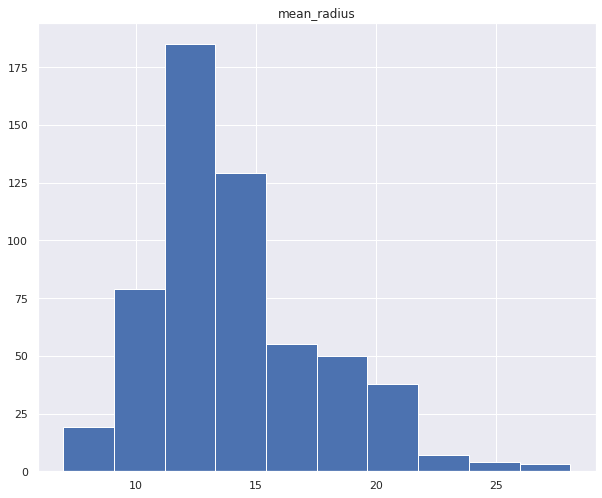

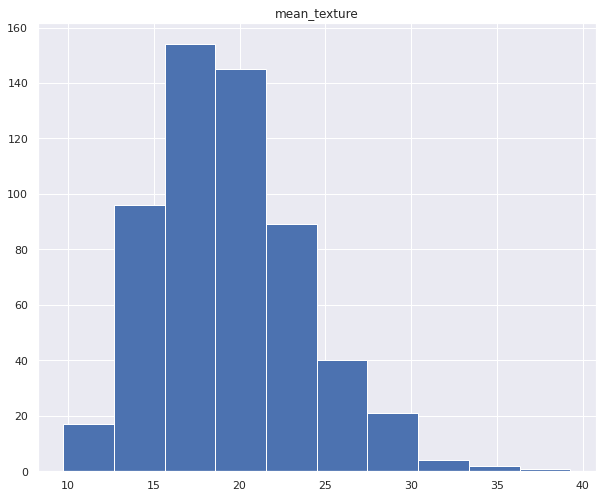

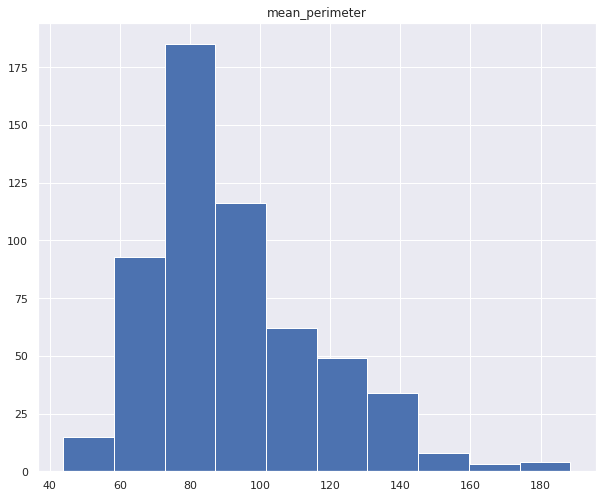

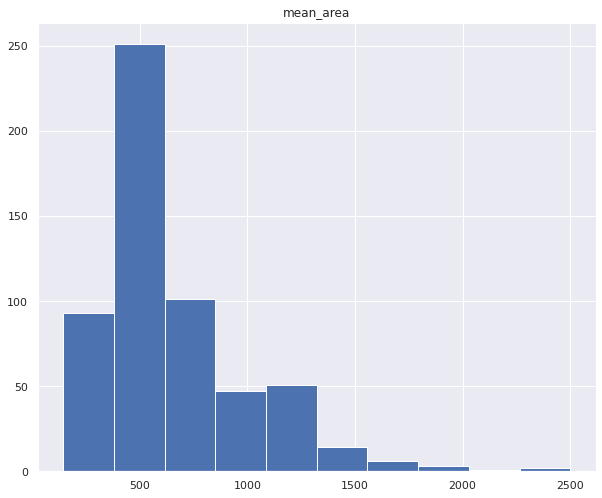

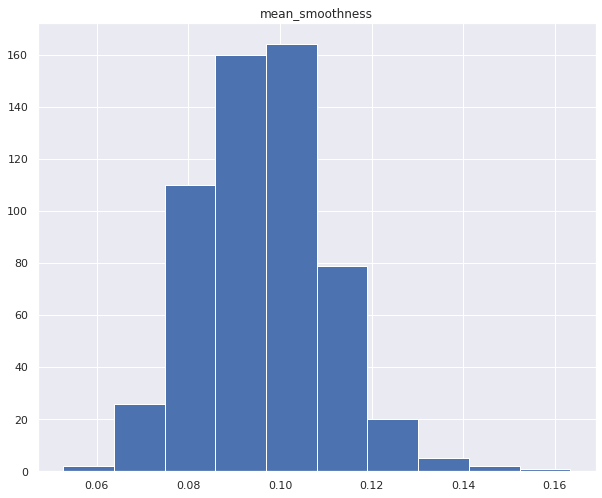

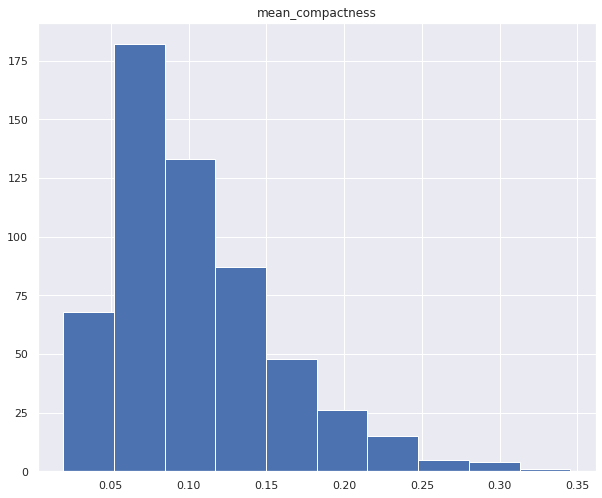

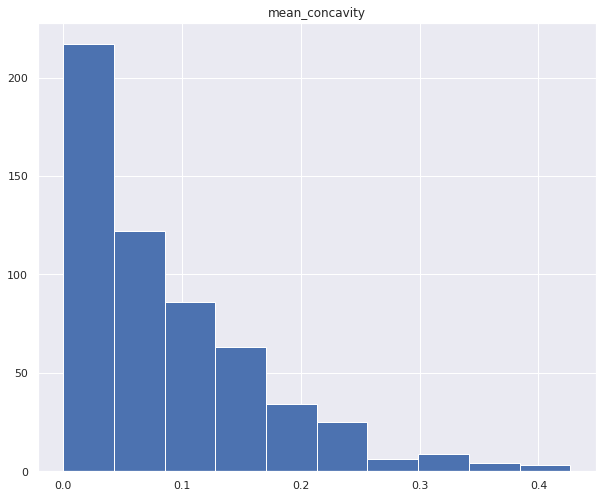

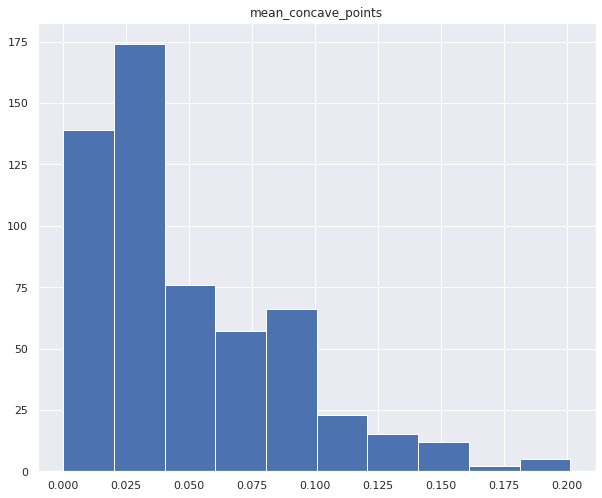

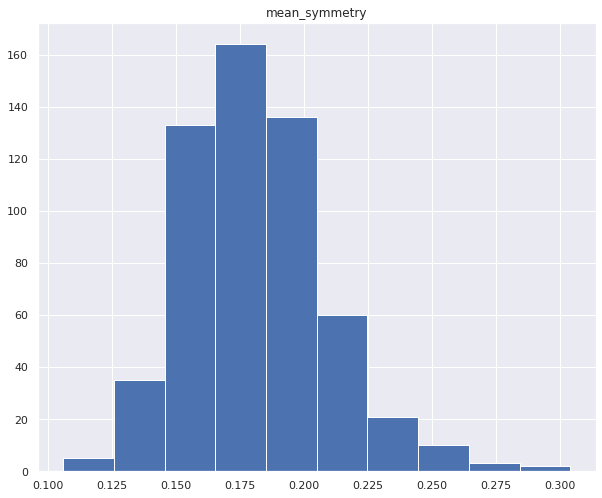

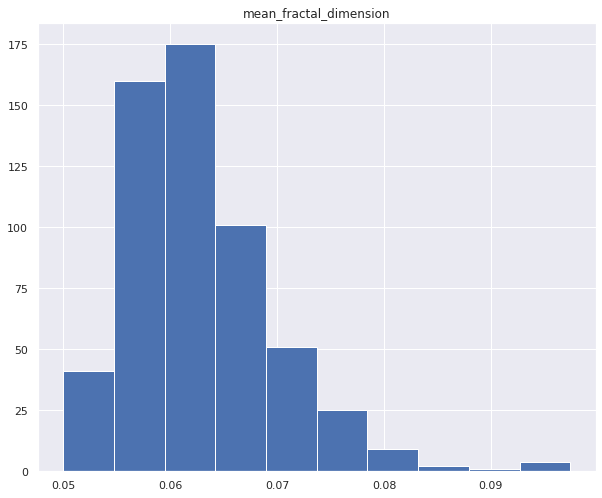

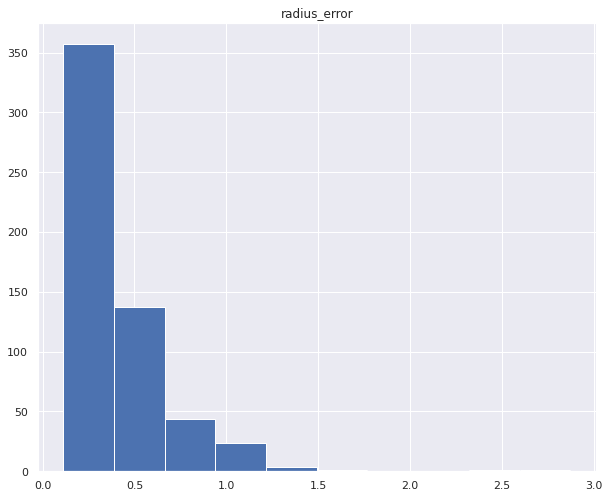

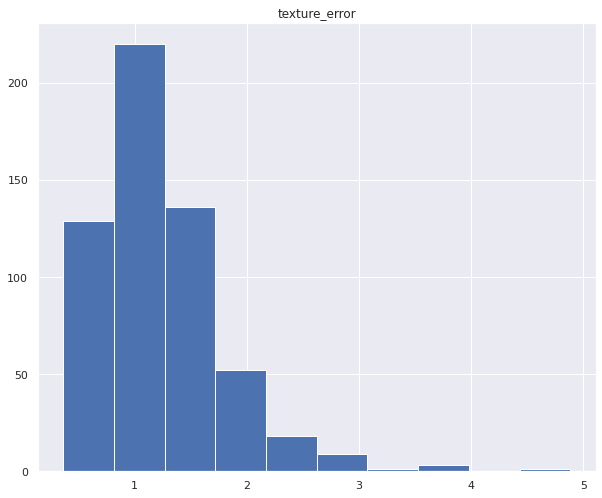

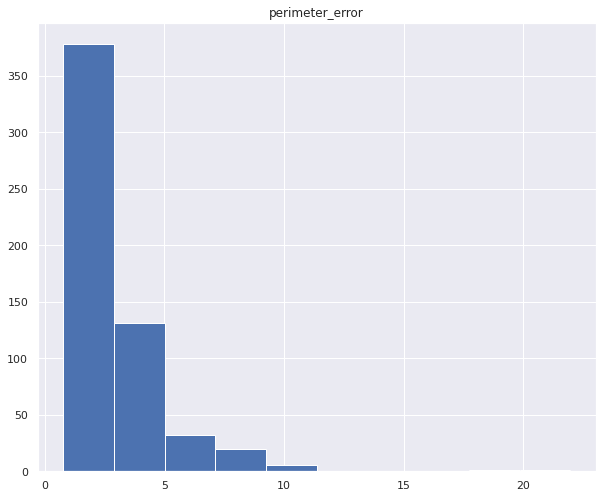

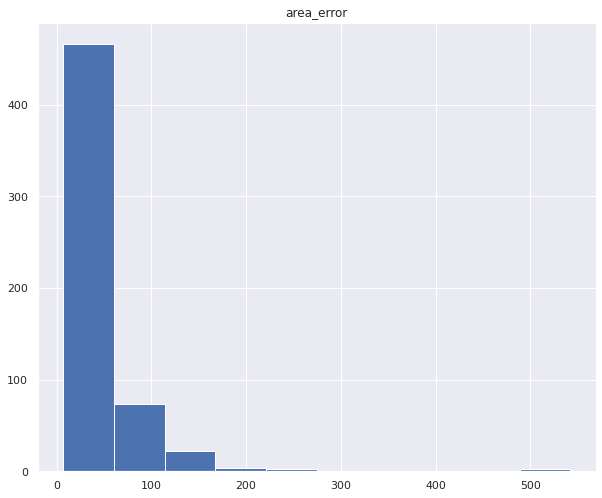

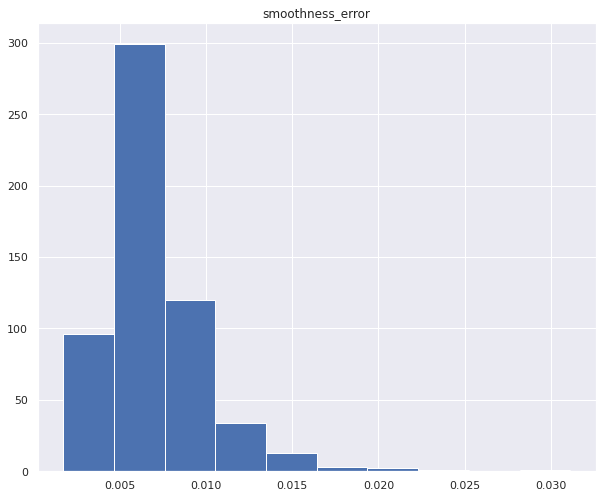

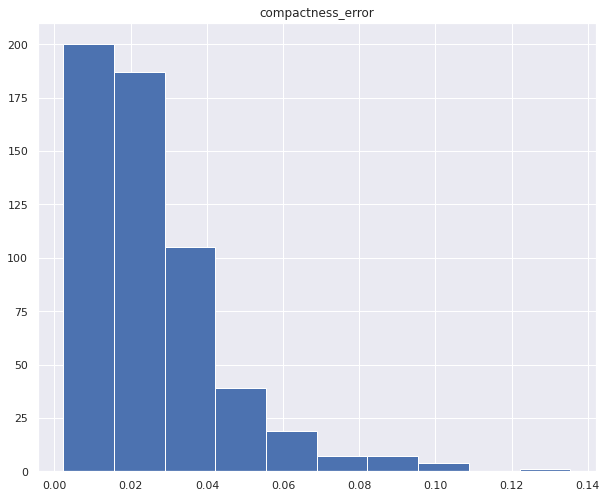

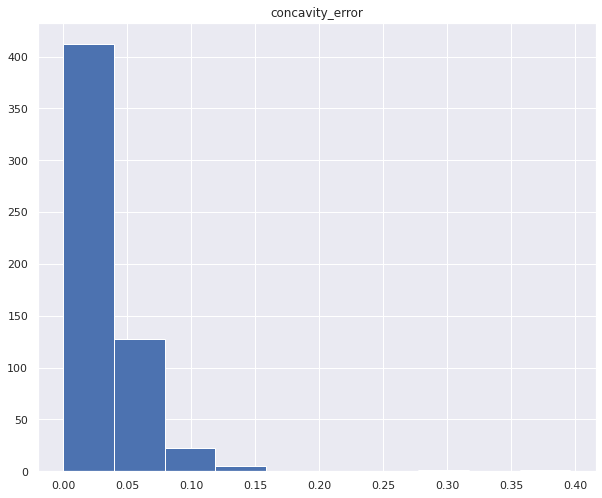

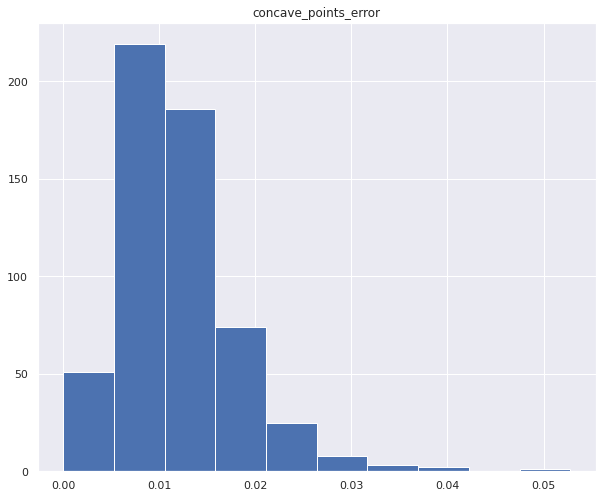

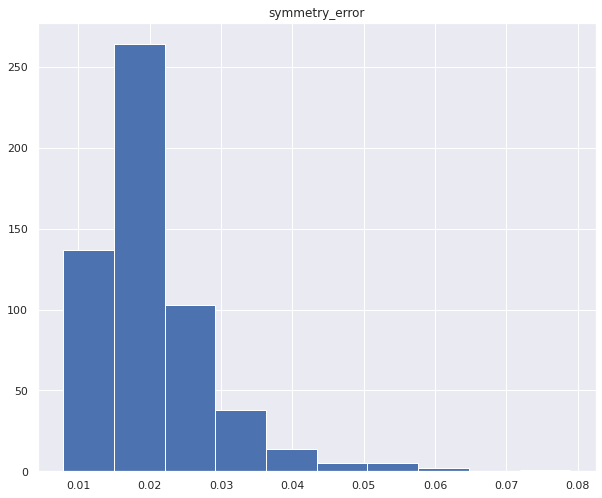

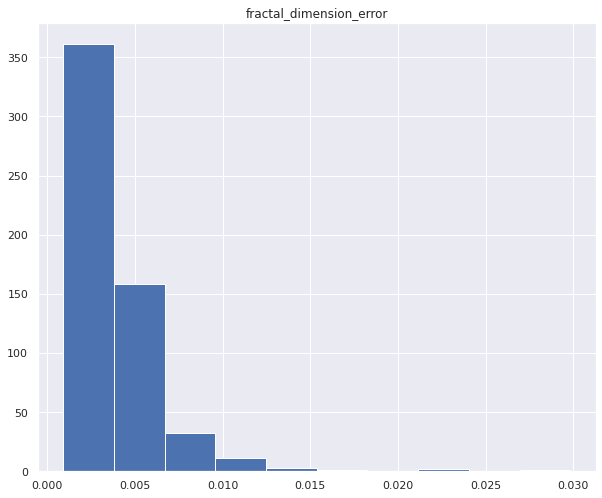

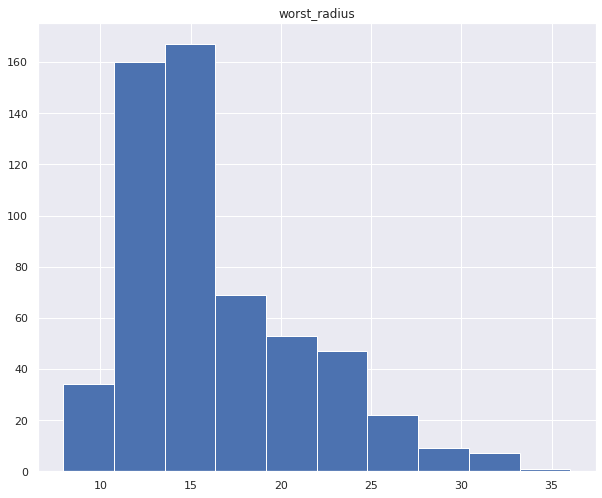

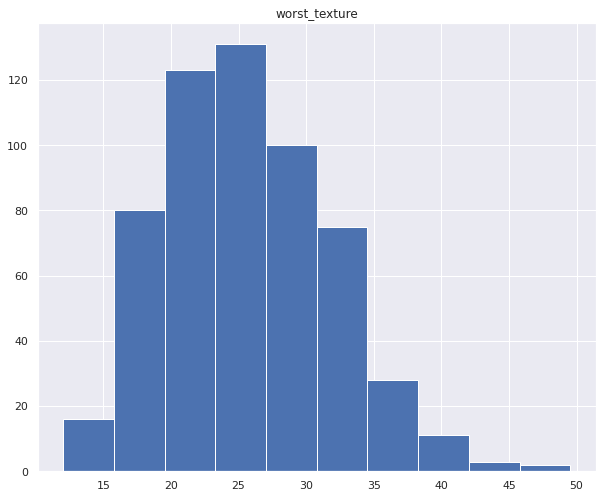

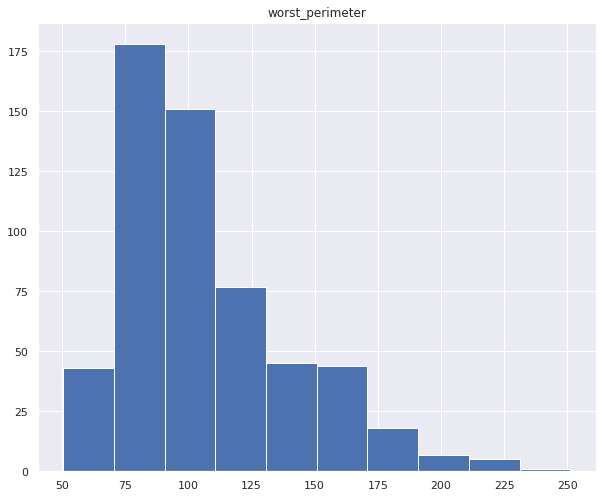

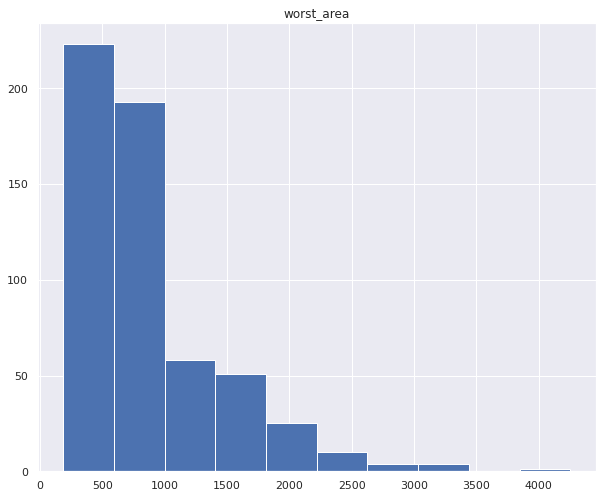

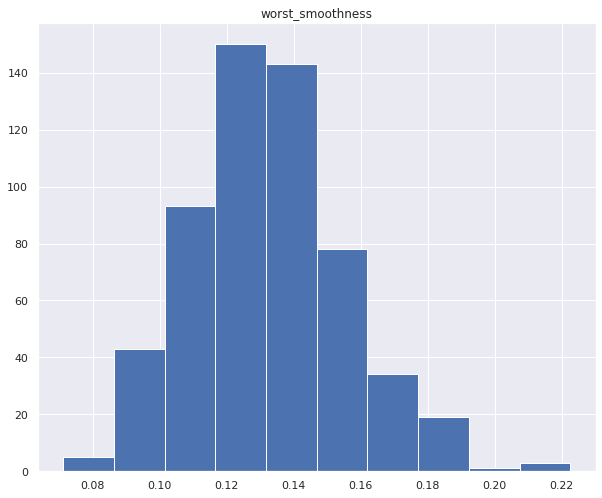

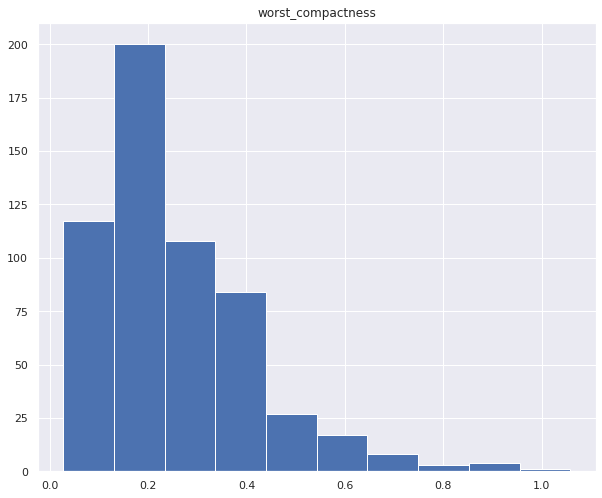

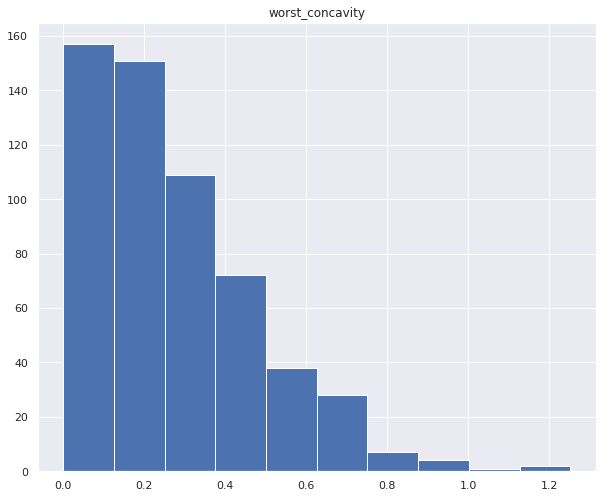

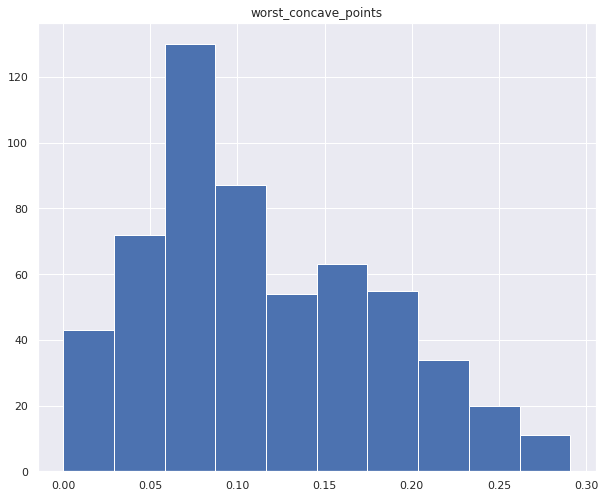

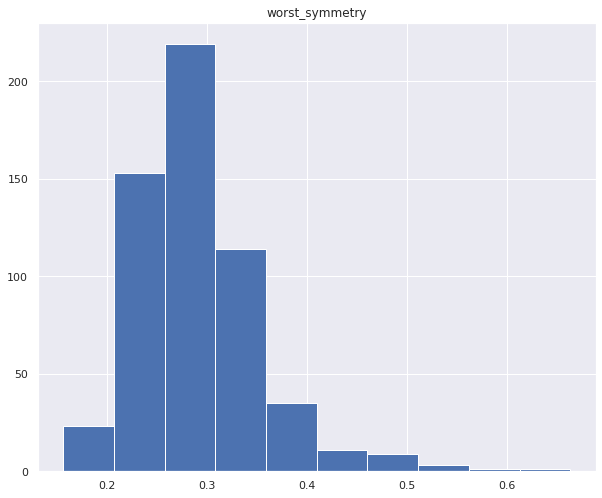

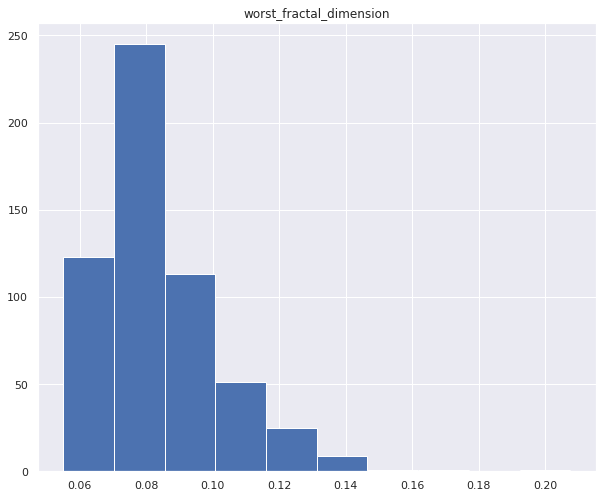

In [16]:
#On génère un histogramme pour chacune des variables

for i in df.columns:
    
    plt.figure()
    plt.title(f'{i}')
    plt.hist(df[i])

In [17]:
df.columns[0:(df.shape[1]-1)]

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matp

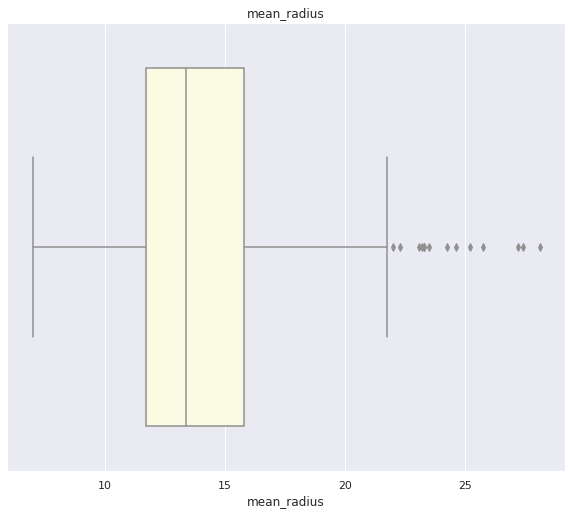

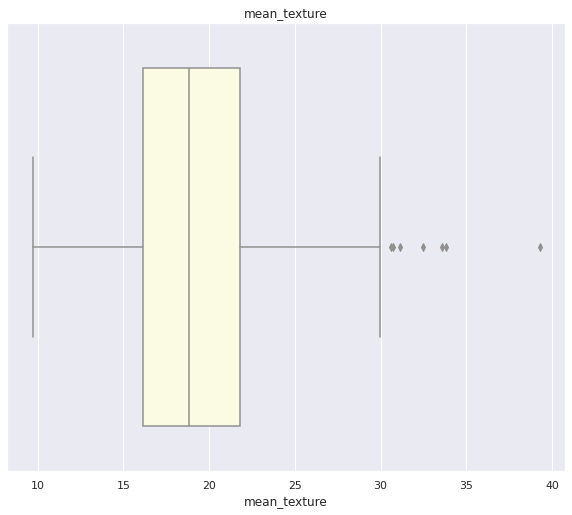

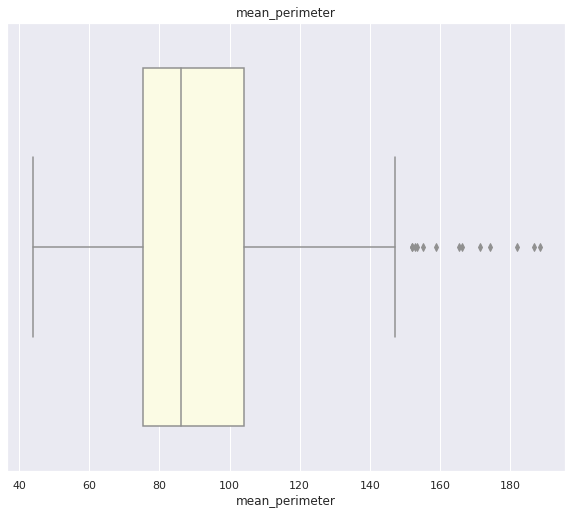

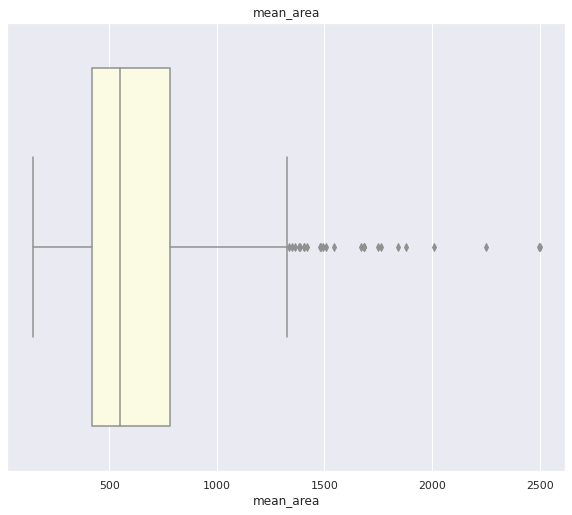

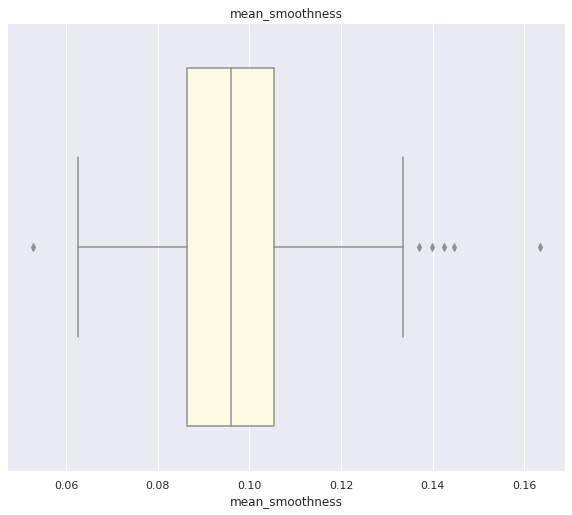

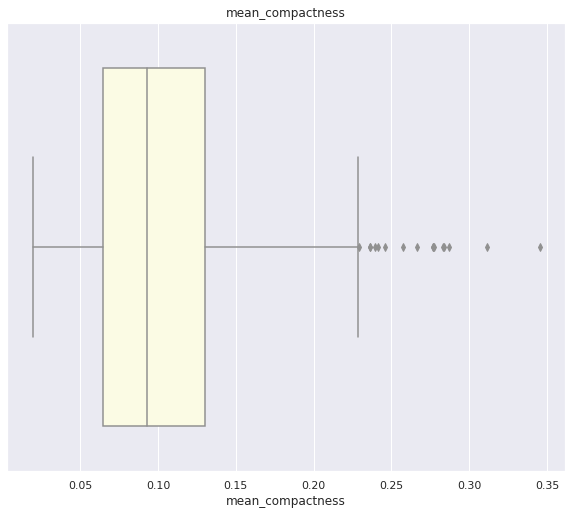

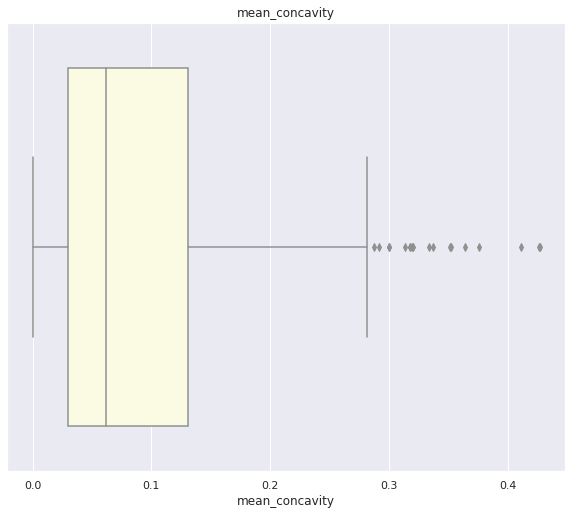

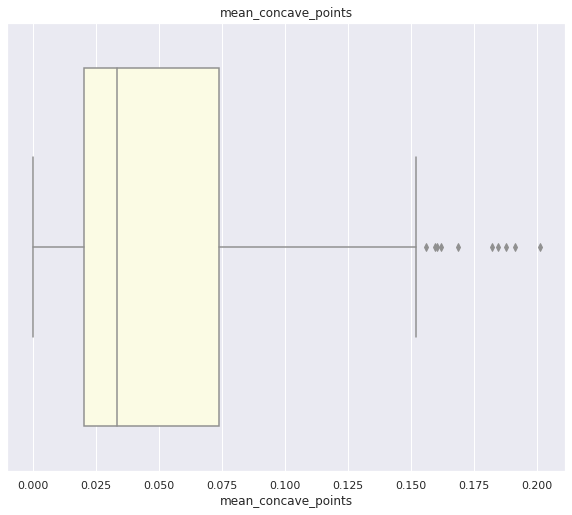

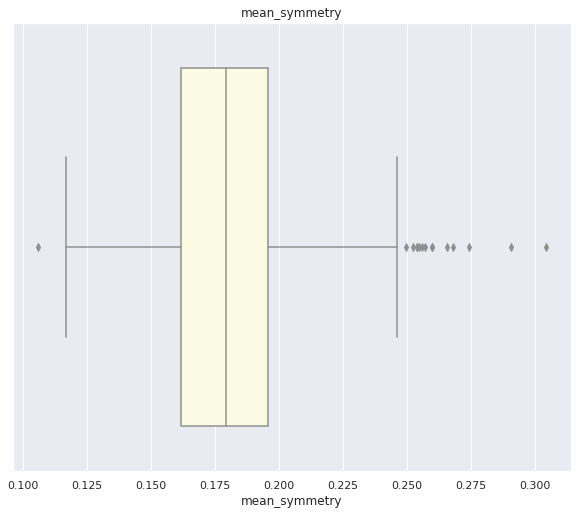

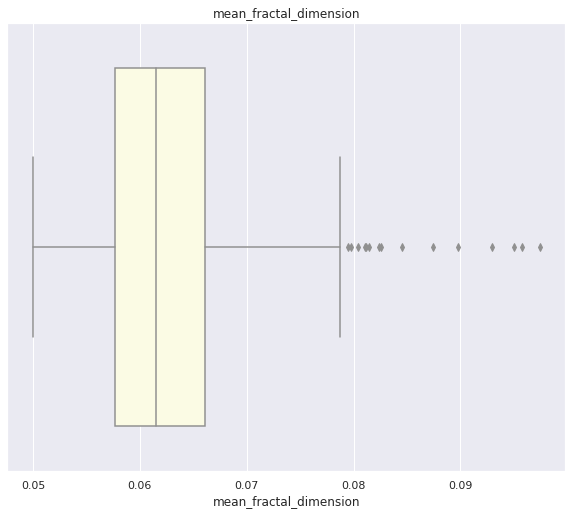

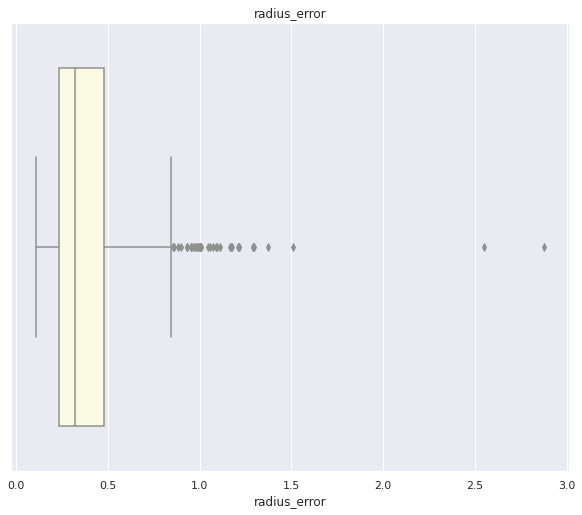

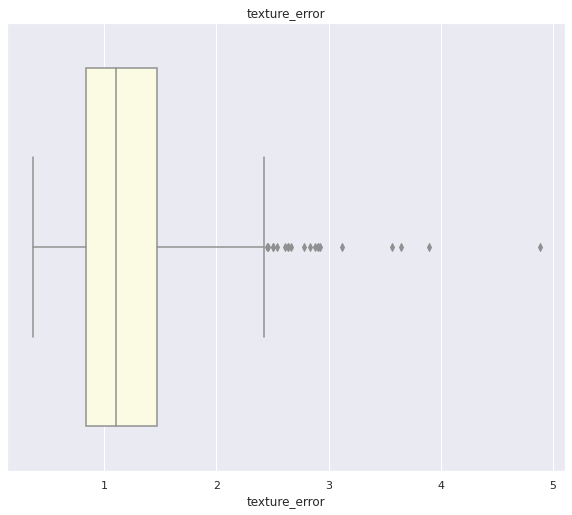

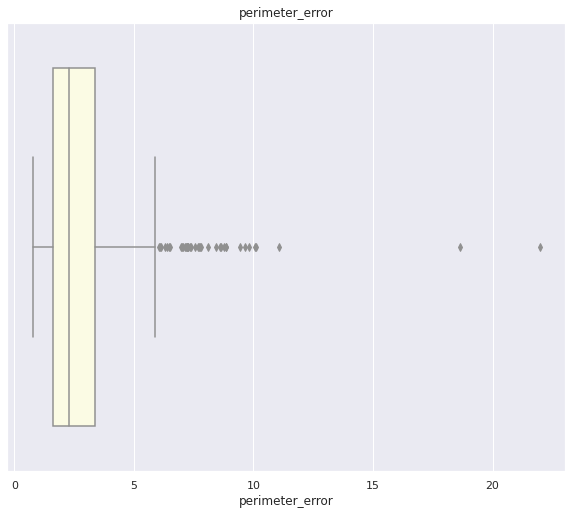

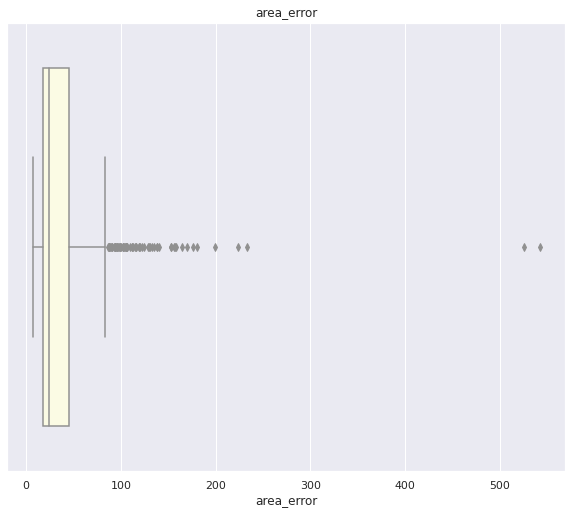

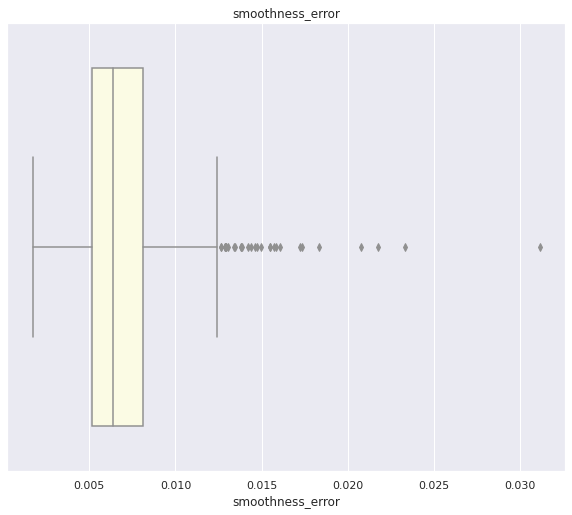

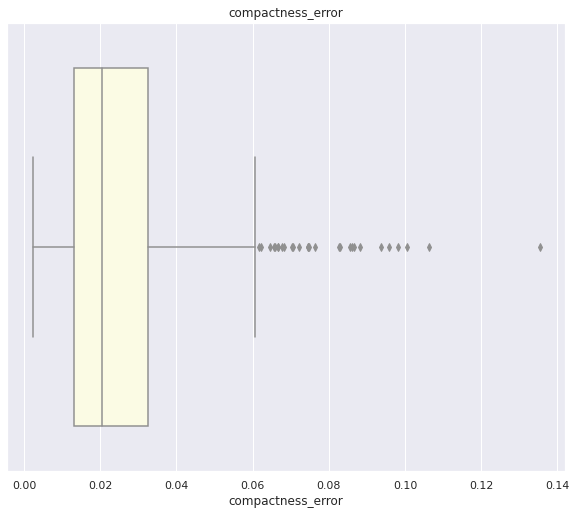

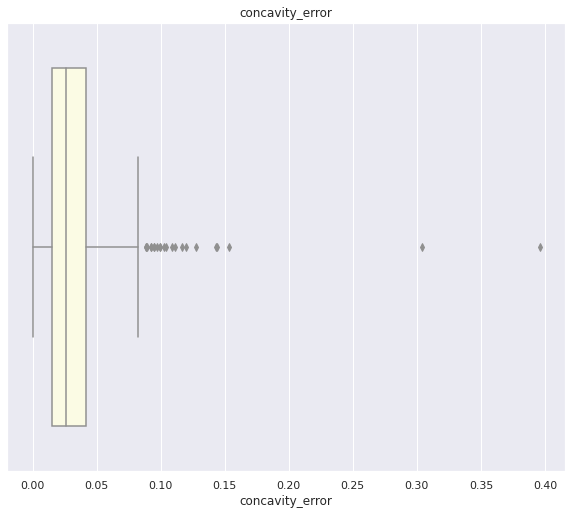

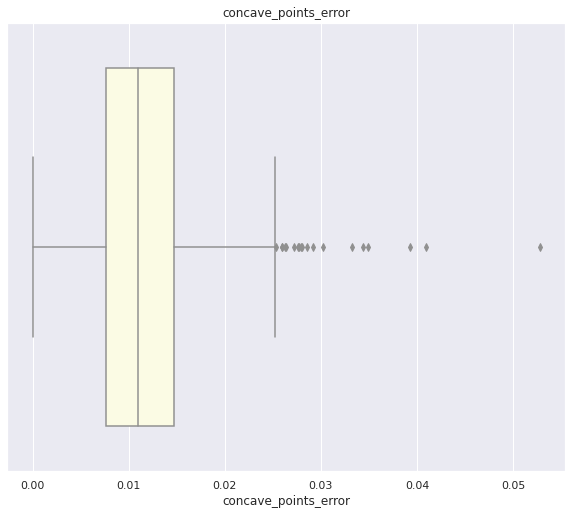

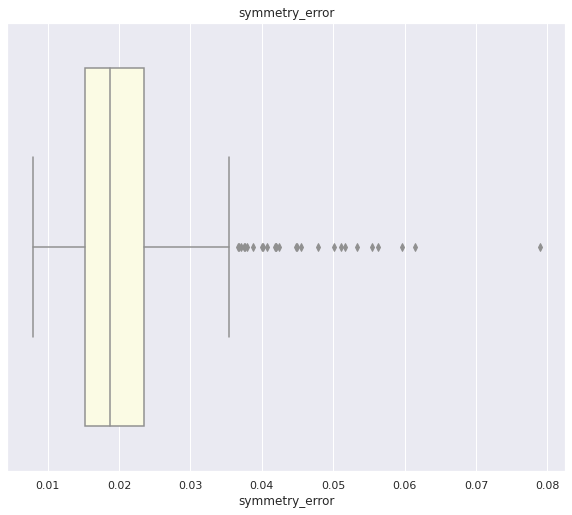

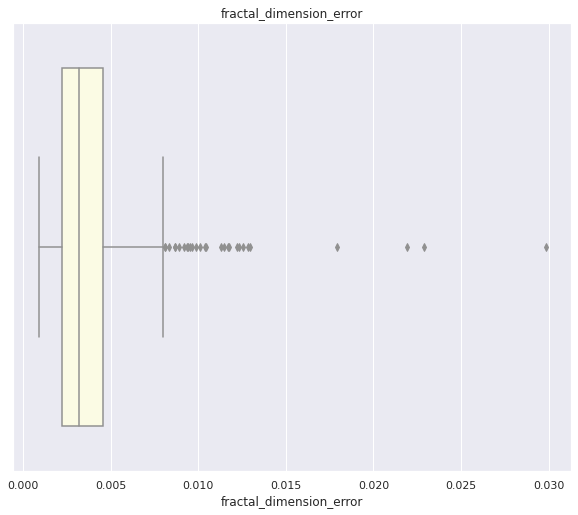

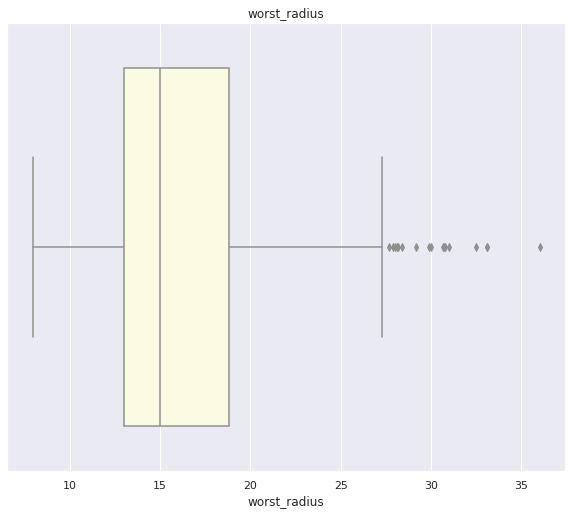

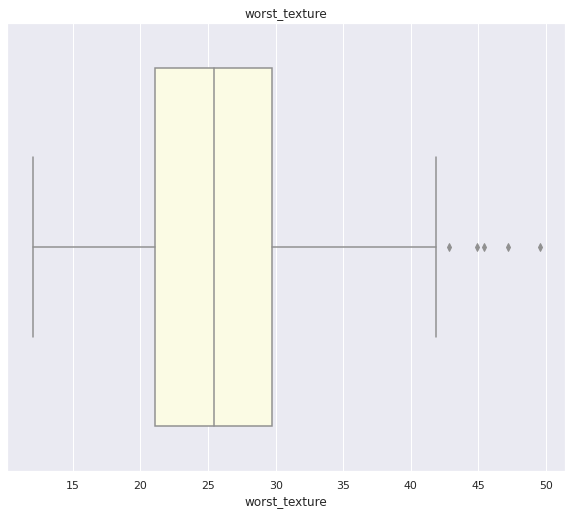

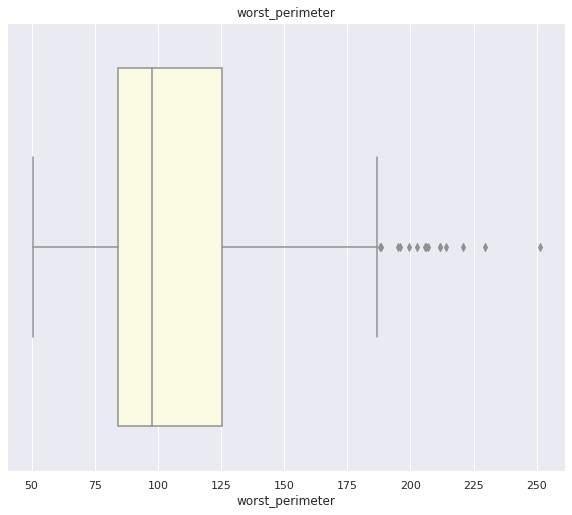

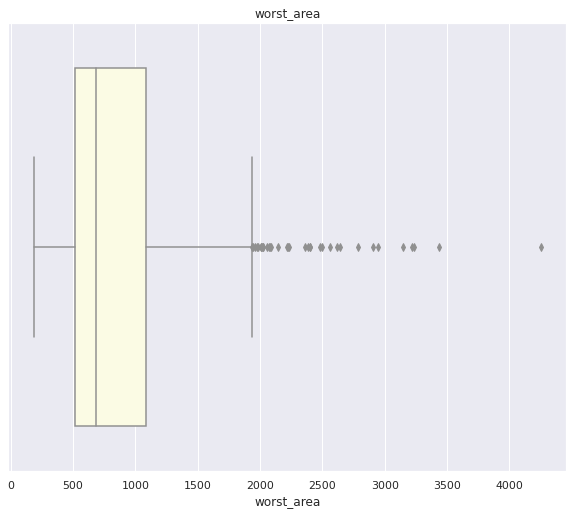

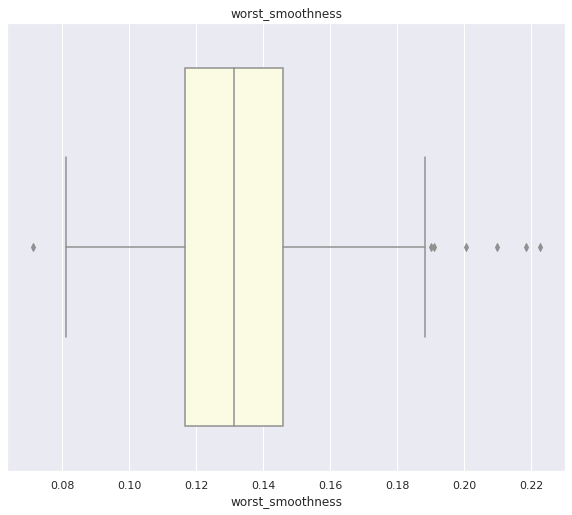

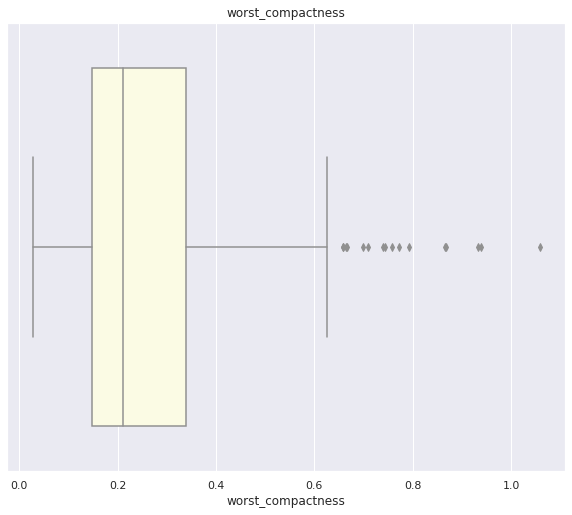

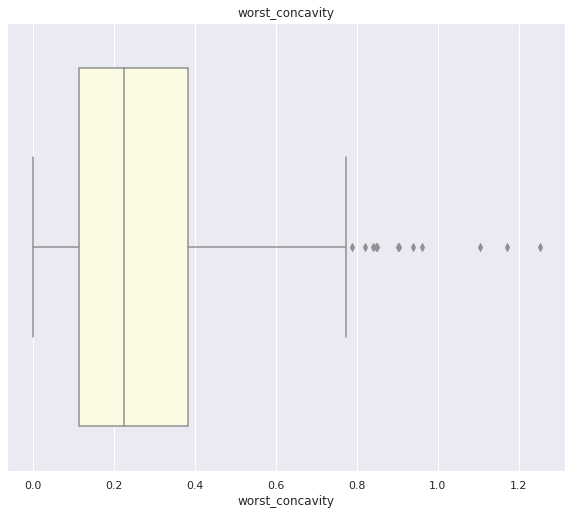

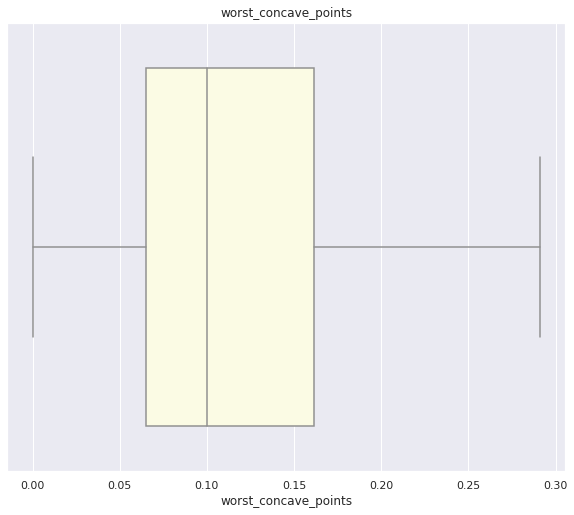

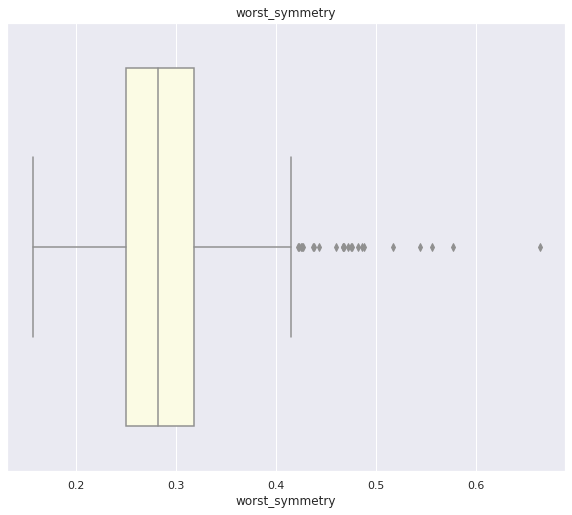

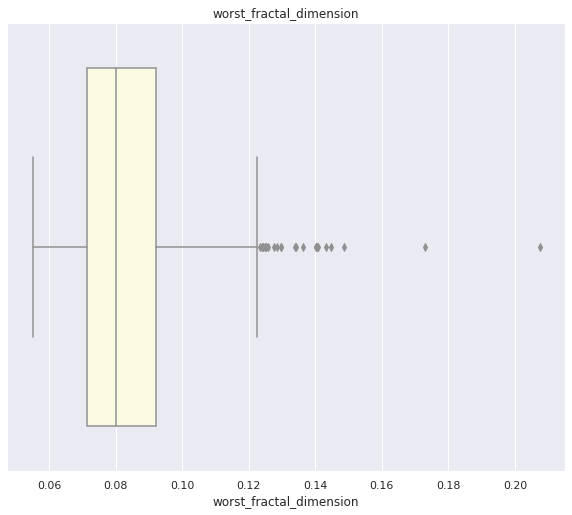

In [18]:
for i in df.columns:

    plt.figure()
    plt.title(f'{i}')
    sns.boxplot(x=df[i], color='lightyellow',)
    

In [19]:
#convention quand on utilise du scikit learn = MajusculeFonction
from scipy.stats import skew
from scipy.stats import kurtosis

In [20]:
kurtosis(df['worst_radius'])

0.9252876046135072

In [21]:
for i in df.columns:

  print("le" ,'\033[1m' + 'kutosis' + '\033[0m',"de", i, "est égal à", round(kurtosis(df[i], axis=0, bias=True),2),"son" ,'\033[1m' + 'skewness' + '\033[0m'," est de :", round(skew(df[i], axis=0, bias=True),2))

le kutosis de mean_radius est égal à 0.83 son skewness  est de : 0.94
le kutosis de mean_texture est égal à 0.74 son skewness  est de : 0.65
le kutosis de mean_perimeter est égal à 0.95 son skewness  est de : 0.99
le kutosis de mean_area est égal à 3.61 son skewness  est de : 1.64
le kutosis de mean_smoothness est égal à 0.84 son skewness  est de : 0.46
le kutosis de mean_compactness est égal à 1.63 son skewness  est de : 1.19
le kutosis de mean_concavity est égal à 1.97 son skewness  est de : 1.4
le kutosis de mean_concave_points est égal à 1.05 son skewness  est de : 1.17
le kutosis de mean_symmetry est égal à 1.27 son skewness  est de : 0.72
le kutosis de mean_fractal_dimension est égal à 2.97 son skewness  est de : 1.3
le kutosis de radius_error est égal à 17.52 son skewness  est de : 3.08
le kutosis de texture_error est égal à 5.29 son skewness  est de : 1.64
le kutosis de perimeter_error est égal à 21.2 son skewness  est de : 3.43
le kutosis de area_error est égal à 48.77 son ske

## Statistiques bivariées

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matp

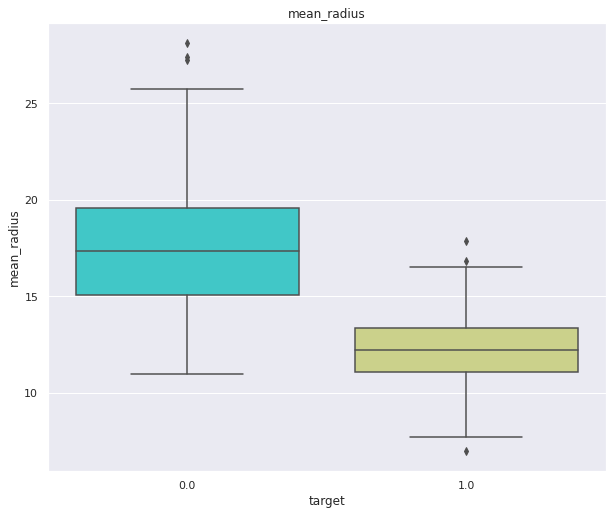

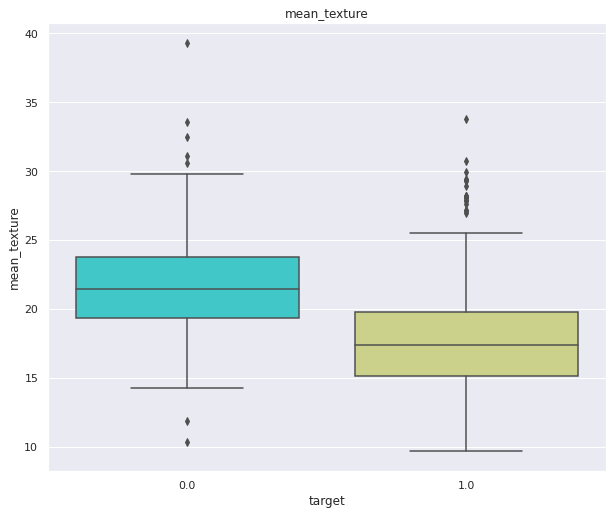

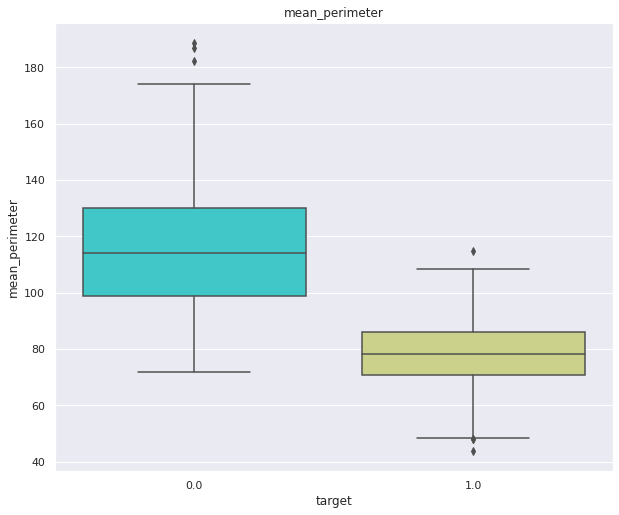

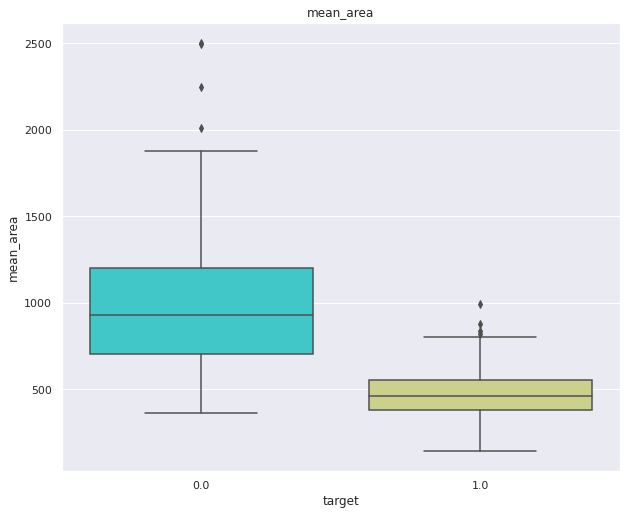

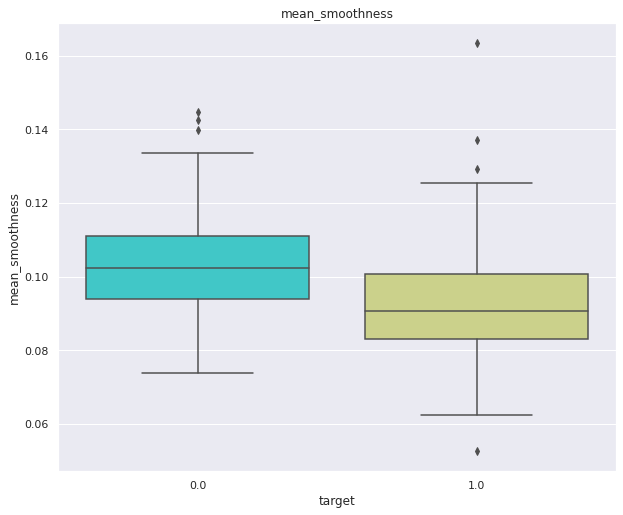

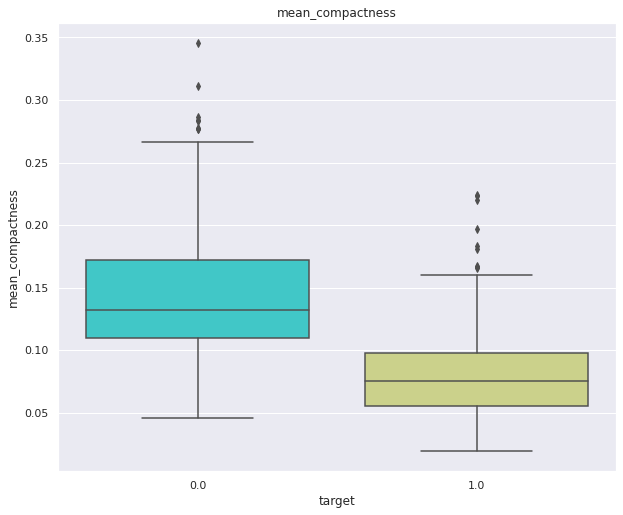

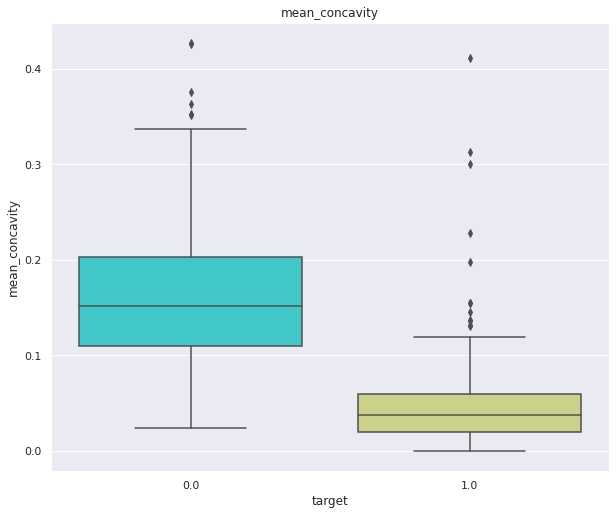

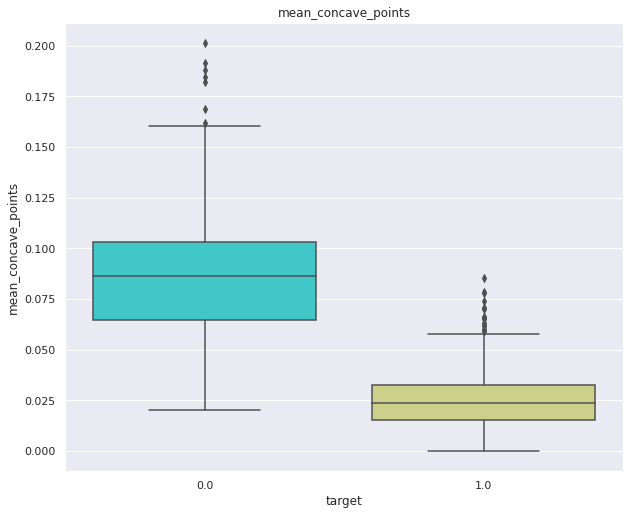

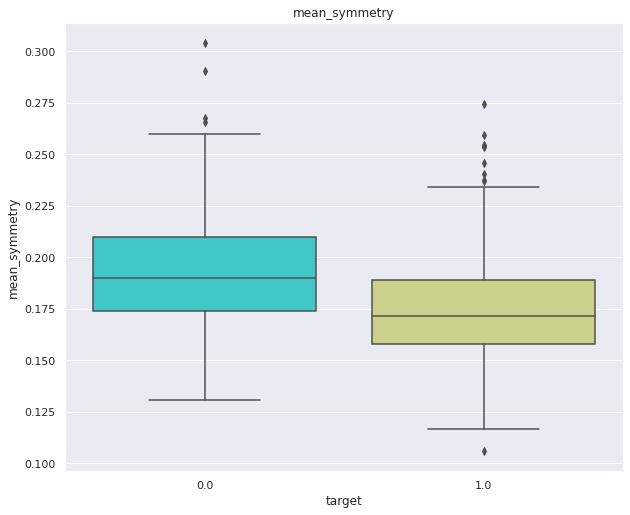

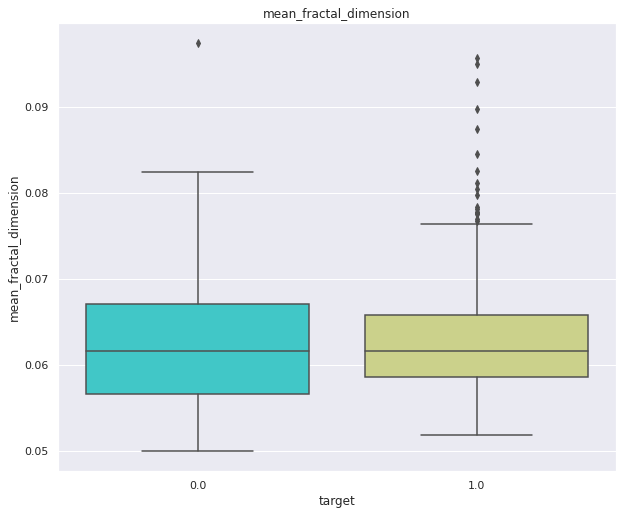

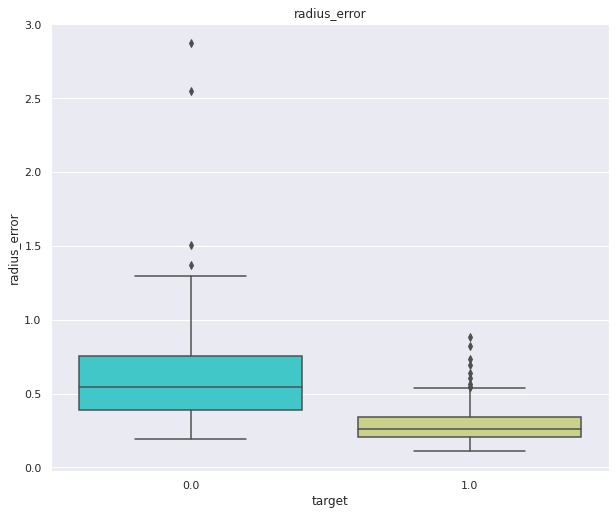

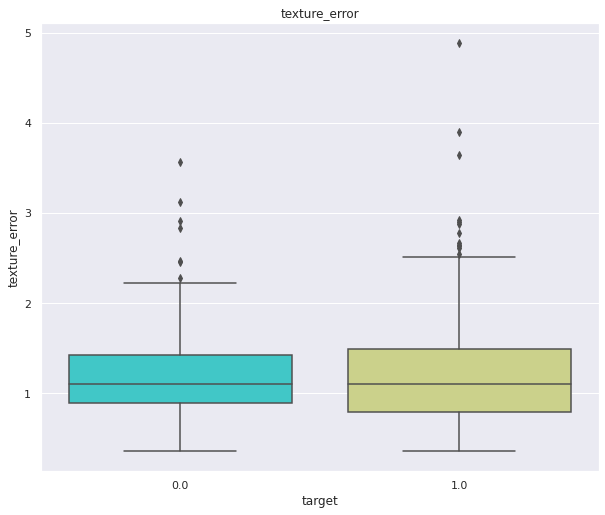

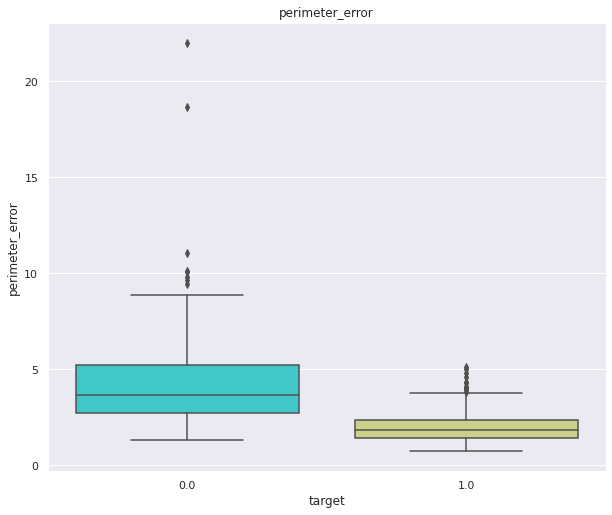

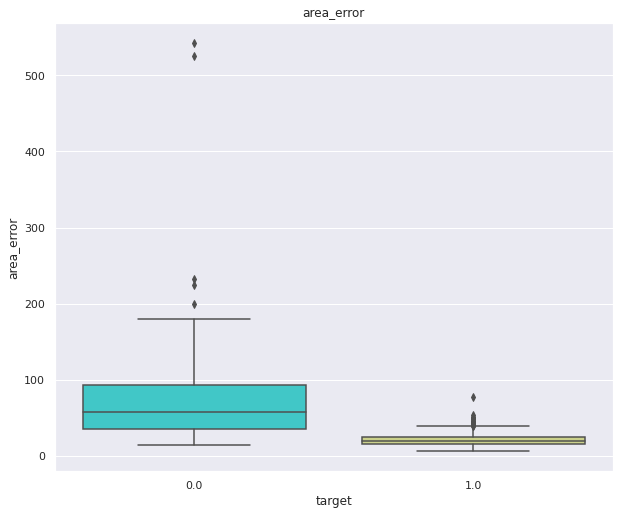

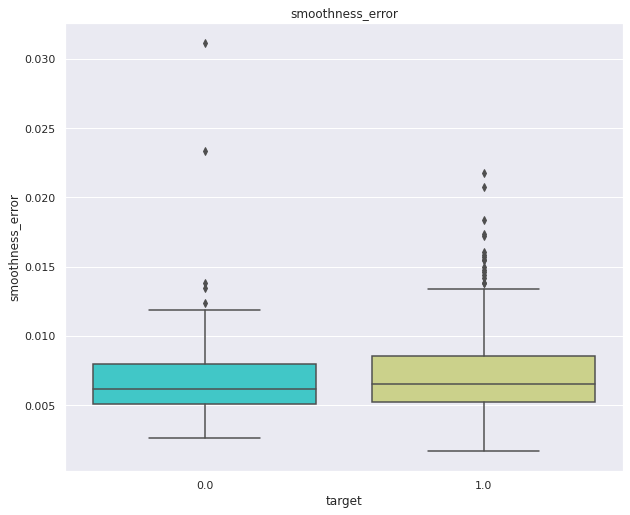

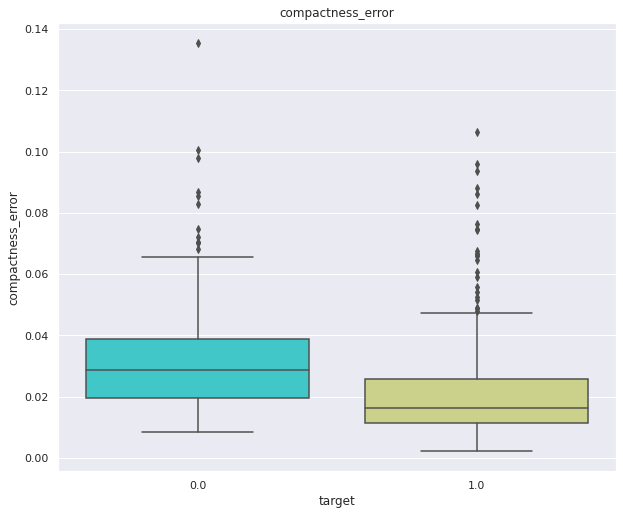

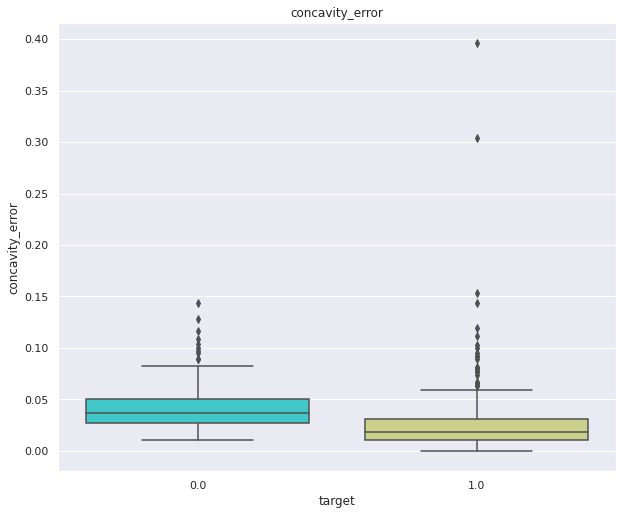

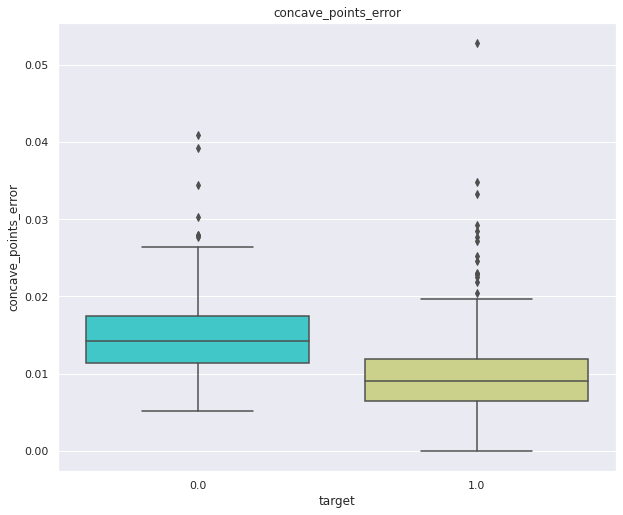

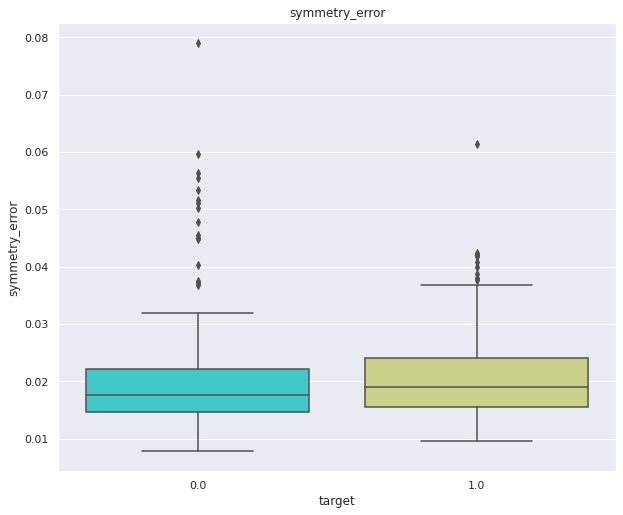

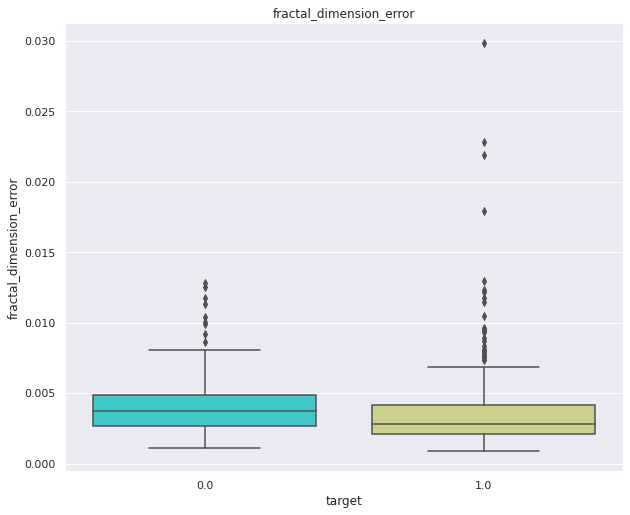

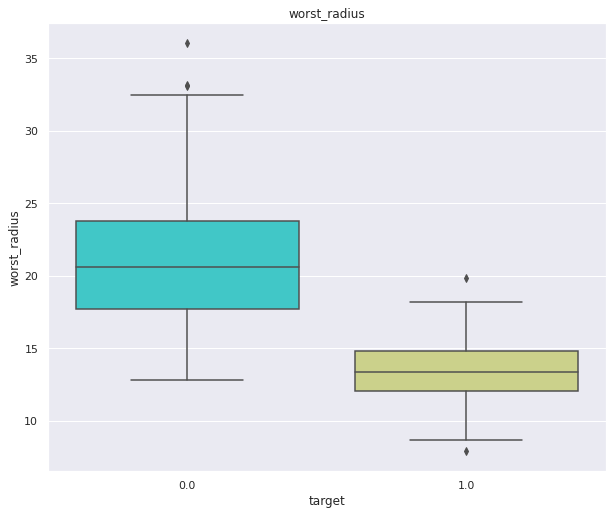

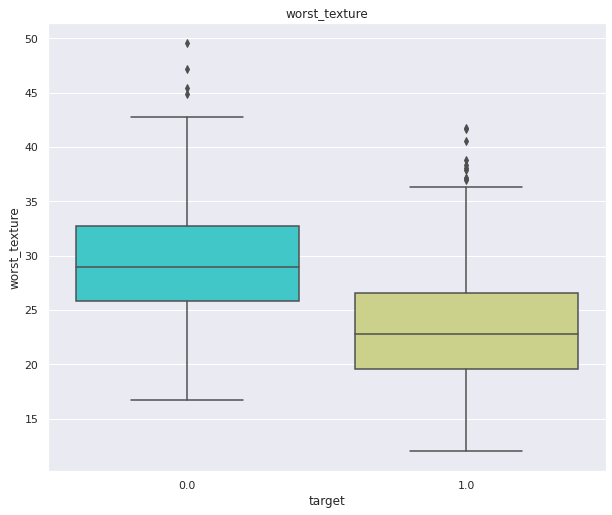

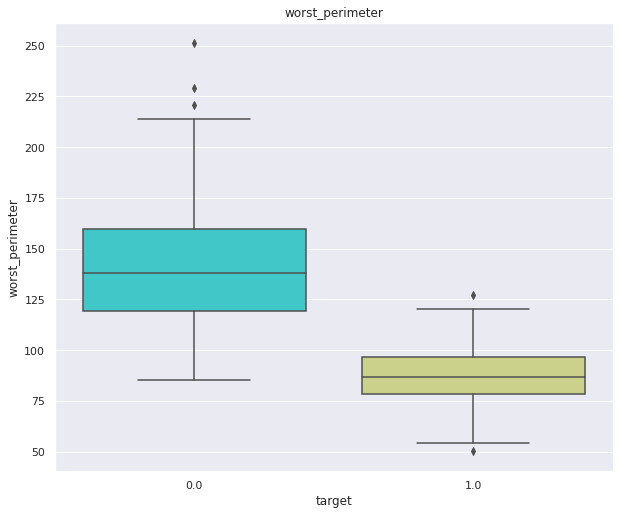

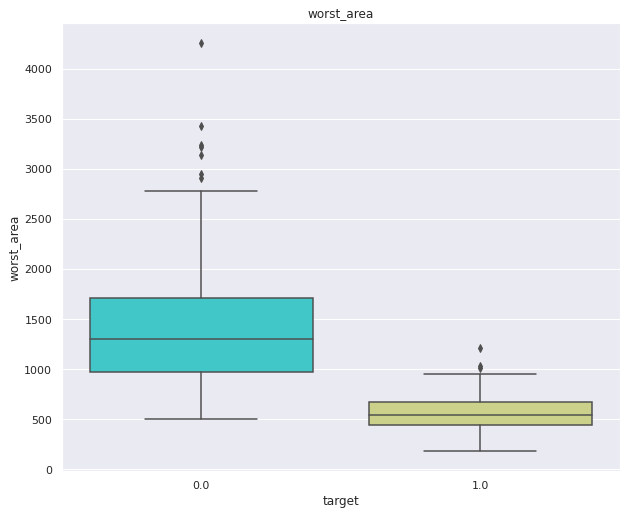

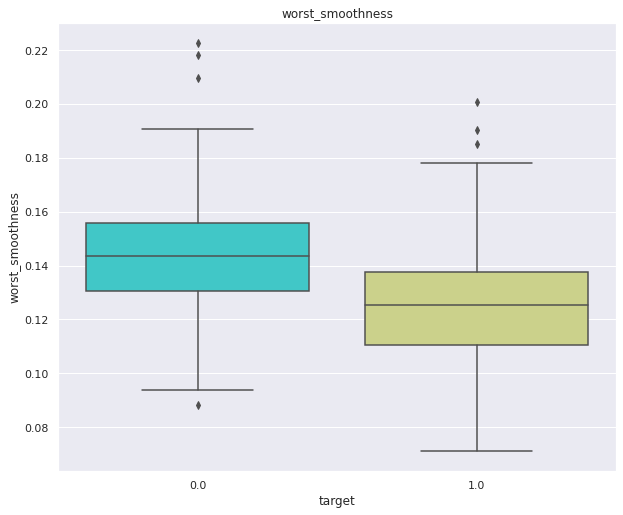

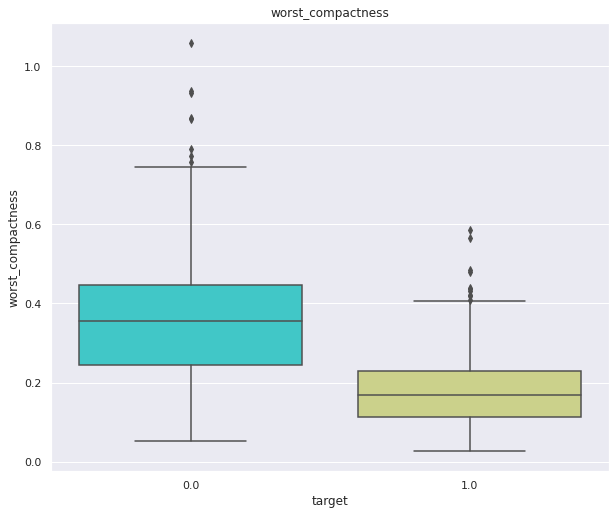

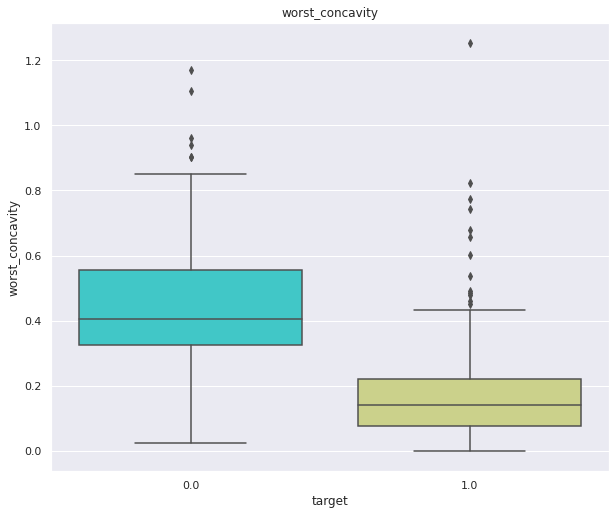

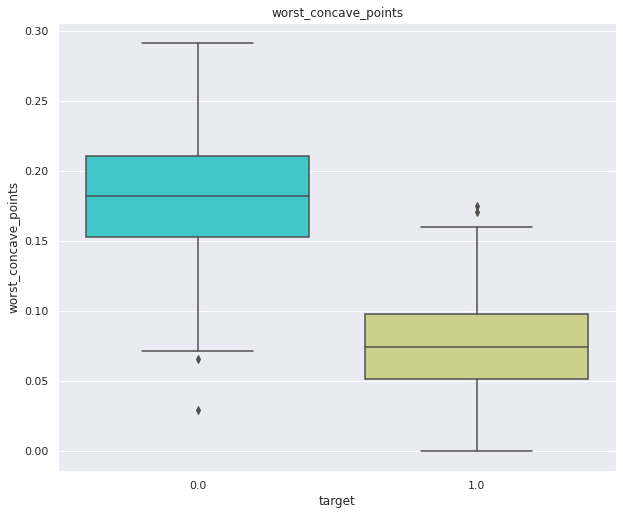

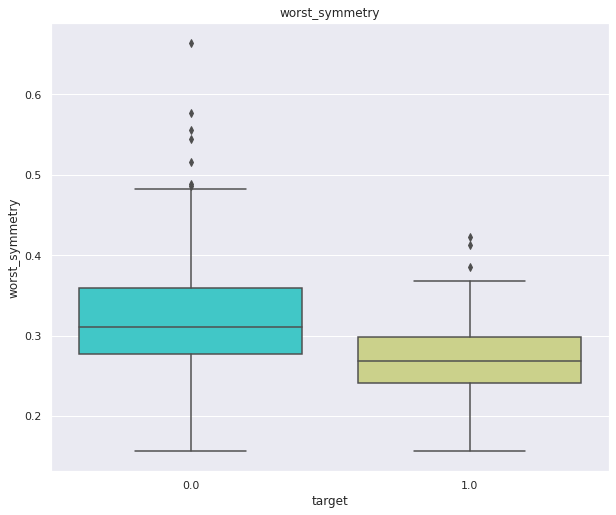

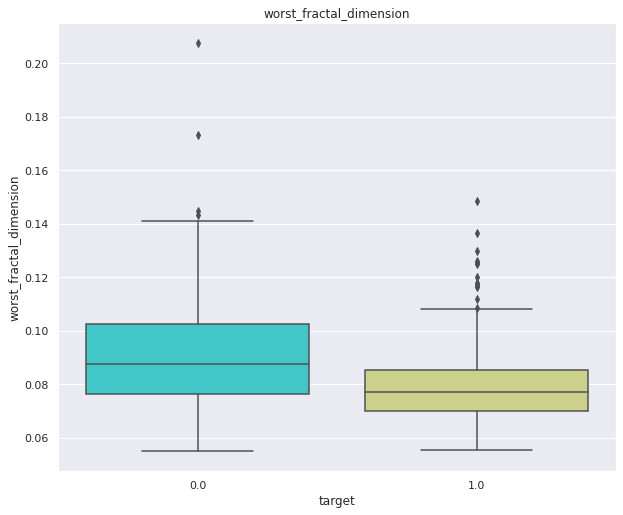

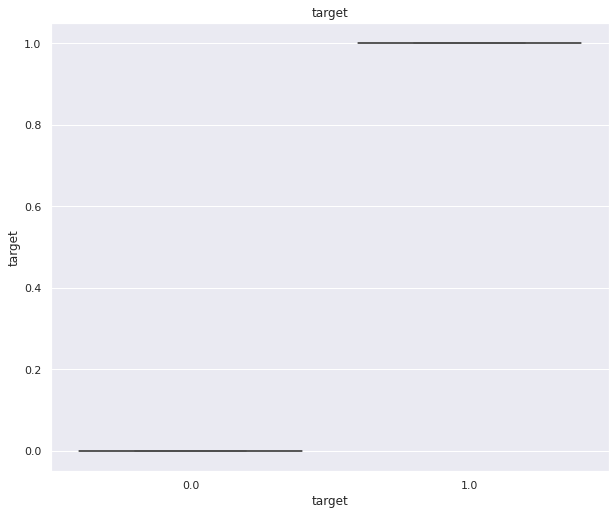

In [25]:
for i in df.columns:

    plt.figure()
    plt.title(f'{i}')
    sns.boxplot(x='target',y=df[i],data=df,palette='rainbow')



## Nouvelle section

#### 3) Recoder les variables si nécessaire


#### 4) Faites une première étape de feature selection avec votre analyse des statistiques

## Modélisation Binaire

#### 5) Importer les modèles suivants SGDClassifier, SVC, LogisticRegression

#### 6) Regarder l'effet du changement de noyau pour la fonction SVC

6.1) Garder uniquement **2 features** pour cette partie<br>
6.2) Utiliser la fonction **plot_predictions** pour voir la fonction de décision en fonction du noyau<br>
6.3) Varier les autres hyperparamètres en plus du kernel<br>

In [ ]:
#plt.scatter(<col_1>, <col_2>, c=<target>)
#plot_predictions(clf, axes)
#clf = model SVC
#axes = [xlim_min, xlim_max, ylim_min, ylim_max]

#### 7) Lancer vos modèles sur les features que vous avez gardés avec vos statistiques descriptives( pour **SVC** utiliser plusieurs noyaux)

On utilise un dataset avec autant features que vous souhaitez maintenant

#### 8) Réaliser une cross-validation afin de déterminer des modèles prometteurs. Ne pas tuner les hyperparamètres 

#### 9) Analyser vos résultats (metrics, erreurs de prédictions, ...)

#### 10) Tuner pour obtenir le meilleur modèle et réaliser une prédiction


<center><h4> Alors, êtes-vous devenu un bon médcin et savez vous détecter un cancer??</h4></center>